In [1]:
import cv2 as cv 
import numpy as np
import json
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
img = cv.imread("../input/carscan/Data Visualization/images/2.jpg")

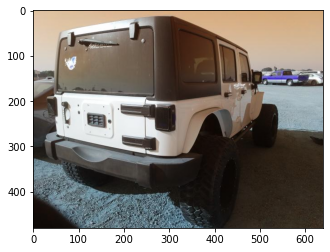

In [3]:
plt.imshow(img)
plt.show()

In [4]:
def getImages(image_path, metadata_path, alpha):
    getImage1(image_path, metadata_path, alpha)
    getImage2(image_path, metadata_path, alpha)

In [5]:
def getImage1(image_path, metadata_path, alpha):
    img = cv.imread(image_path)
    # f = open(meta_data_json_path, "r")
    metadata = json.loads((open(metadata_path, "r")).read())
    alpha = alpha

    df = pd.DataFrame(metadata)
    coords = df[df["type"] == "polygonlabels"]["value"]

    original_width = df["original_width"][1]
    original_height = df["original_height"][1]
    color = (0,255,0)
    thickness = 2
    shapes = np.zeros_like(img, np.uint8)

    # df["value"][1]['polygonlabels'][0]

    for i in range(len(coords)):
        #setting coordinates
        new_pts = np.array(coords.iloc[i]["points"] ) 
        #de-normalizing
        new_pts[:,0] = new_pts[:,0]*original_width/100
        new_pts[:,1] = new_pts[:,1]*original_height/100

        new_pts = new_pts.reshape((-1, 1, 2))
        new_pts

        
        image = cv.polylines(img, np.int32([new_pts]), True , color, thickness)
        shapes = cv.fillPoly(shapes, np.int32([new_pts]), color )

    out = image.copy()
#     alpha = 0.2
    mask = shapes.astype(bool)
    out[mask] = cv.addWeighted(image, alpha, shapes, alpha, 0)[mask]

    plt.figure(figsize = (15,20))
    plt.imshow(out)
    plt.show()


In [6]:
def getImage2(image_path, metadata_path, alpha) :
    img = cv.imread(image_path)
    # f = open(meta_data_json_path, "r")
    metadata = json.loads((open(metadata_path, "r")).read())
    alpha = alpha

    df = pd.DataFrame(metadata)   
    coords = df[df["type"] == "polygonlabels"]["value"]
    

    original_width = df["original_width"][1]
    original_height = df["original_height"][1]
    color = (0,255,0)
    thickness = 2
    shapes = np.zeros_like(img, np.uint8)


    # df["value"][1]['polygonlabels'][0]

    for i in range(len(coords)):
        #setting coordinates
        new_pts = np.array(coords.iloc[i]["points"] ) 
        #de-normalizing
        new_pts[:,0] = new_pts[:,0]*original_width/100
        new_pts[:,1] = new_pts[:,1]*original_height/100

        new_pts = new_pts.reshape((-1, 1, 2))
        new_pts

        #finding the edge coordinates for bbox
        x1 , y1 = min(new_pts[:,0][:,0]), min(new_pts[:,0][:,1])
        x2 , y2 = max(new_pts[:,0][:,0]), max(new_pts[:,0][:,1])
        #setting as start end pts   
        start_point = (math.floor(x1), math.floor(y1))
        end_point = (math.ceil(x2), math.ceil(y2))


        #for cv putText
        font = cv.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        text = coords.iloc[i]['polygonlabels'][0]


        image = cv.polylines(img, np.int32([new_pts]), True , color, thickness)        
        image = cv.rectangle(image, start_point , end_point , color, thickness)
        image = cv.putText(image, text, start_point, font,fontScale,color ,thickness, cv.LINE_AA)
        image = cv.putText(image, text, start_point, font,fontScale,(255,0,0) , 1, cv.LINE_AA) 
        shapes = cv.fillPoly(shapes, np.int32([new_pts]), color )

    out = image.copy()
#     alpha = 0.8
    mask = shapes.astype(bool)
    out[mask] = cv.addWeighted(image, alpha, shapes, alpha, 0)[mask]

    plt.figure(figsize = (15,20))
    plt.imshow(out)
    plt.show()
    

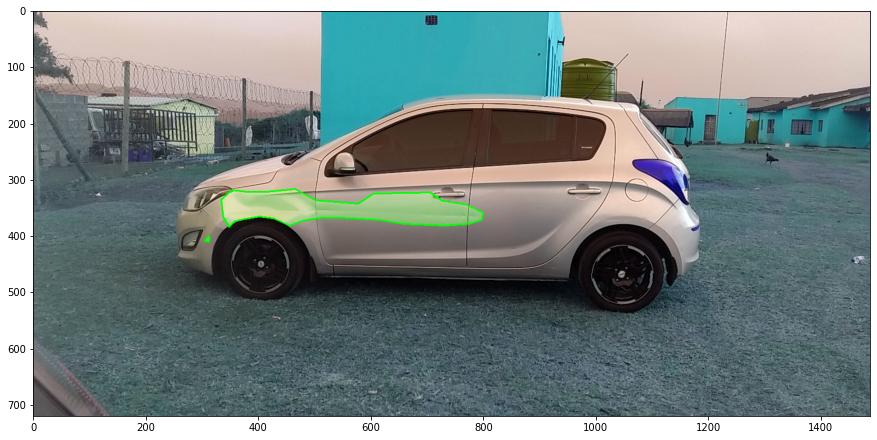

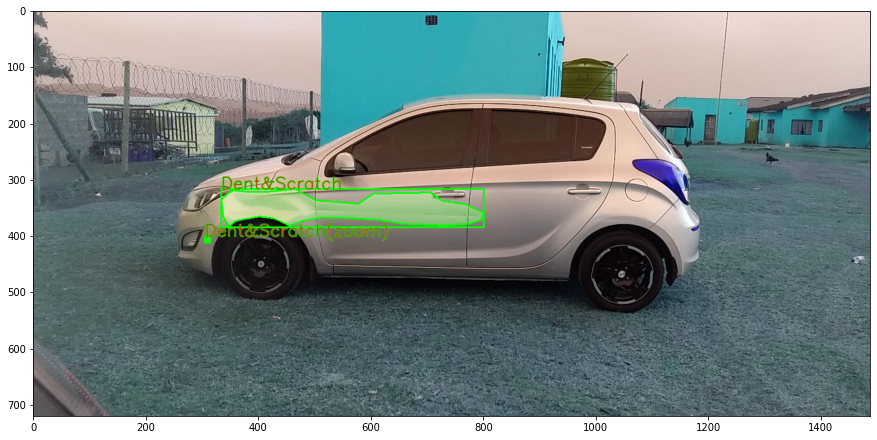

In [7]:
getImages("../input/carscan/Data Visualization/images/3.jpg","../input/carscan/Data Visualization/data/3.json", 0.5)